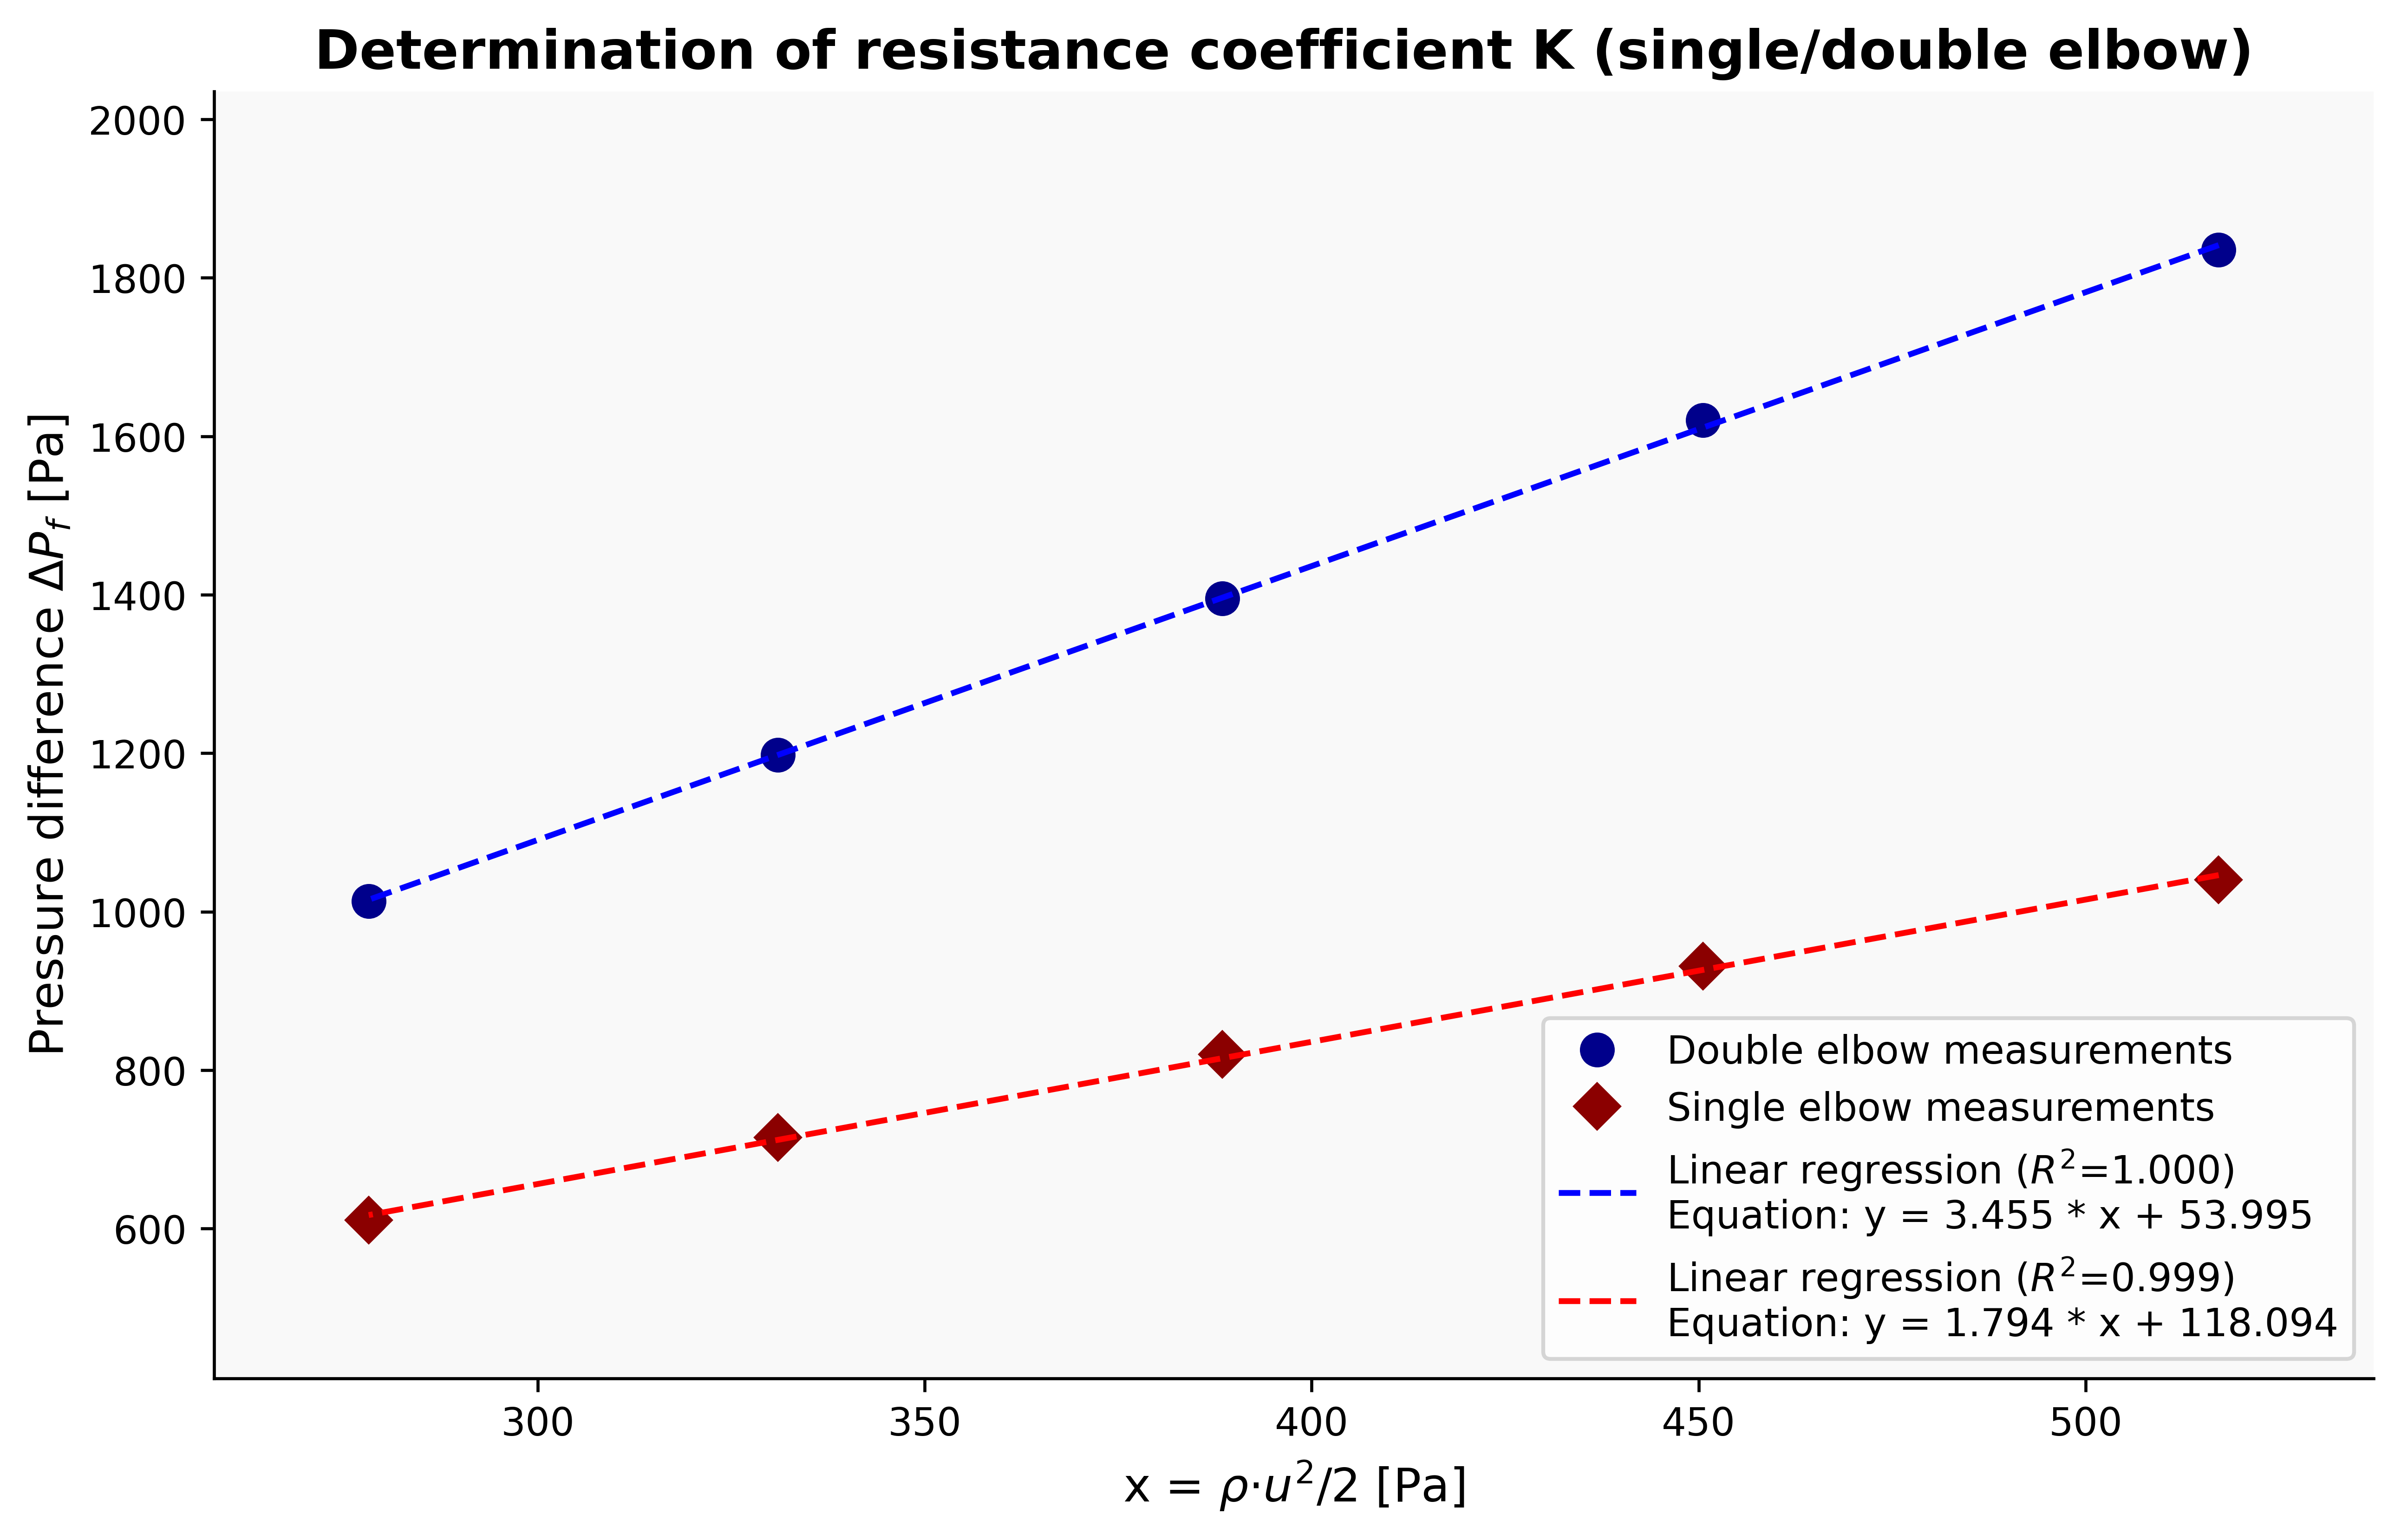

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np


def read_excel_data(file_path):
    df = pd.read_excel(file_path, sheet_name="ELBOW", skiprows=1)
    return df

def plot_graph(data_frame):
    x1 = data_frame['x_double'][0:5]
    y1 = data_frame['DP2 [Pa]'][0:5]
    
    x2 = data_frame['x_single'][0:5]
    y2 = data_frame['DP1 [Pa]'][0:5]
    
    plt.figure(figsize=(10, 6), dpi = 600)  # Adjust figure size for better presentation

    # Plot data with specific style elements
    plt.plot(x1, y1, label='Double elbow measurements', color='darkblue', linestyle='', marker='o', markersize=8, linewidth=1.5)
    plt.plot(x2, y2, label='Single elbow measurements', color='darkred', linestyle='', marker='D', markersize=8, linewidth=1.5)
    
    plt.xlabel('x = $ρ⋅u^{2}/2$ [Pa]', fontsize=12)
    plt.ylabel('Pressure difference $ΔP_{f}$ [Pa]', fontsize=12)
    plt.title('Determination of resistance coefficient K (single/double elbow) ', fontsize=14, weight='bold')

    # Round x-axis ticks to two decimal places
    #rounded_ticks = [round(float(val), 2) for val in x]
    #plt.xticks(ticks=rounded_ticks, fontsize=10)
    # Adjust grid density
    plt.xticks(ticks=plt.xticks()[0][::1], fontsize=10, rotation ='horizontal')
    plt.yticks(ticks=plt.yticks()[0][::1], fontsize=10)

    plt.grid(False)

    # Add a subtle background color
    plt.gca().set_facecolor('#f9f9f9')

    # Remove spines for cleaner appearance
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    
    # Invert y-axis
    #plt.gca().invert_yaxis()
    
     # Set x-axis and y-axis limits
    delta_x=20
    delta_y=200
    plt.xlim(min(x1)-delta_x, max(x2)+delta_x)
    plt.ylim(min(y2)-delta_y, max(y1)+delta_y)
    
    
    #Linear regression x1 data
    fit_params1 = np.polyfit(x1, y1, 1) #degree 1 equation
    fit_line1 =[(fit_params1[0]*x1 + fit_params1[1]) for x1 in x1]
    R1 = (np.corrcoef(x1, y1)[0,1])**2 # R coefficient
    equation1 = f'Equation: y = {fit_params1[0]:.3f} * x + {fit_params1[1]:.3f}'
    
    #Linear regression x1 data
    fit_params2 = np.polyfit(x2, y2, 1) #degree 1 equation
    fit_line2 =[(fit_params2[0]*x2 + fit_params2[1]) for x2 in x2]
    R2 = (np.corrcoef(x2, y2)[0,1])**2 # R coefficient
    equation2 = f'Equation: y = {fit_params2[0]:.3f} * x + {fit_params2[1]:.3f}'
    
    # Plot linear regression
    plt.plot(x1, fit_line1, label=f'Linear regression ($R^{2}$={R1:.3f}) \n{equation1}', color='blue', linestyle='--', linewidth=1.5)
    plt.plot(x2, fit_line2, label=f'Linear regression ($R^{2}$={R2:.3f}) \n{equation2}', color='red', linestyle='--', linewidth=1.5)
    
    plt.legend(loc='lower right')
    
def save_svg(file_path):
    plt.savefig(file_path + ".png", format='png')  # Save as a PNG file for matplotlib

def main():
    excel_file_path = r"C:/Users/nilst/Documents/EPFL/BA_4/TP_ENG/TP-2_Q/TUBES.xlsx"
    download_folder =r"C:/Users/nilst/Documents/EPFL/BA_4/TP_ENG/TP-2_Q/"

    # Read data from Excel file
    data = read_excel_data(excel_file_path)

    # Plot the graph
    plot_graph(data)
    
    # Save the graph as an SVG file and download it
    svg_file_path = os.path.join(download_folder, 'graph_Coeff_K')
    save_svg(svg_file_path)
    
    plt.show()

if __name__ == "__main__":
    main()
